# 0. Executive Summary

This project ...




# 1. Data preparation


## 1.1 Loading libraries and data
Load the datasets into pandas dataframes named ‘data_training’ and 'data_test'.

In [ ]:
!pip install missingno

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

SyntaxError: invalid syntax (1358431127.py, line 4)

In [5]:
train_df = pd.read_excel("Project2_Training.xlsx")
test_df  = pd.read_excel("Project2_Test.xlsx")

## 1.2 Undertanding the data

In [11]:
train_df.head()

,QUOTEDATE,VEHICLEYEAR,VEHICLEMAKE,VEHICLEMODEL,ANNUAL_KM,COMMUTE_DISTANCE,MARKING_SYSTEM,TRACKING_SYSTEM,VEHICLE_OWNERSHIP,VEHICLE_VALUE,...,YEARS_AS_PRINCIPAL_DRIVER,MULTI_PRODUCT,MARITAL_STATUS,OCCUPATION,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT,IS_BOUND
0,2016-01-02,2006,VOLKSWAGEN,JETTA 2.5 4P,10000.0,NaN,NaN,NaN,Owned,3000.0,...,10.0,No,Married,Trades,0,0,0,0,0,0
1,2016-01-02,2017,HYUNDAI,ELANTRA GL 4DR,20000.0,NaN,NaN,NaN,Owned,1.0,...,NaN,No,Married,Not Known,0,0,0,0,0,0
2,2016-01-02,2015,CHEVROLET TRUCK/VAN,SILVERADO 2500 HD LT CREW CAB 4WD,15000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,No,Single,Not Known,0,0,0,0,0,0
3,2016-01-02,2010,TOYOTA,COROLLA CE 4DR,20000.0,20.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,0
4,2016-01-04,2013,HONDA,CIVIC LX 4DR,30000.0,30.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,0


In [14]:
print(train_df.shape, test_df.shape)

(15114, 25)

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101891 entries, 0 to 101890
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   QUOTEDATE                       101891 non-null  datetime64[ns]
 1   VEHICLEYEAR                     101891 non-null  int64         
 2   VEHICLEMAKE                     101891 non-null  object        
 3   VEHICLEMODEL                    101891 non-null  object        
 4   ANNUAL_KM                       101890 non-null  float64       
 5   COMMUTE_DISTANCE                66478 non-null   float64       
 6   MARKING_SYSTEM                  25 non-null      object        
 7   TRACKING_SYSTEM                 4 non-null       object        
 8   VEHICLE_OWNERSHIP               25441 non-null   object        
 9   VEHICLE_VALUE                   37218 non-null   float64       
 10  VEHICLEUSE                      101891 non-null  object 

In [7]:
print("Missing values before handling:")
print(train_df.isnull().sum())

Missing values before handling:
QUOTEDATE                              0
VEHICLEYEAR                            0
VEHICLEMAKE                            0
VEHICLEMODEL                           0
ANNUAL_KM                              1
COMMUTE_DISTANCE                   35413
MARKING_SYSTEM                    101866
TRACKING_SYSTEM                   101887
VEHICLE_OWNERSHIP                  76450
VEHICLE_VALUE                      64673
VEHICLEUSE                             0
GENDER                                 5
YEAR_OF_BIRTH                          0
POSTAL_CODE                            0
AREA_CODE                              0
YEARS_LICENSED                         8
YEARS_AS_PRINCIPAL_DRIVER         101279
MULTI_PRODUCT                          0
MARITAL_STATUS                         0
OCCUPATION                             1
CONVICTION_COUNT_MINOR_3YRS            0
CONVICTION_COUNT_MAJOR_3YRS            0
CONVICTION_COUNT_CRIMINAL_3YRS         0
ASSIGNED_LOSSES_PD_5YRS  

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/


<Axes: >

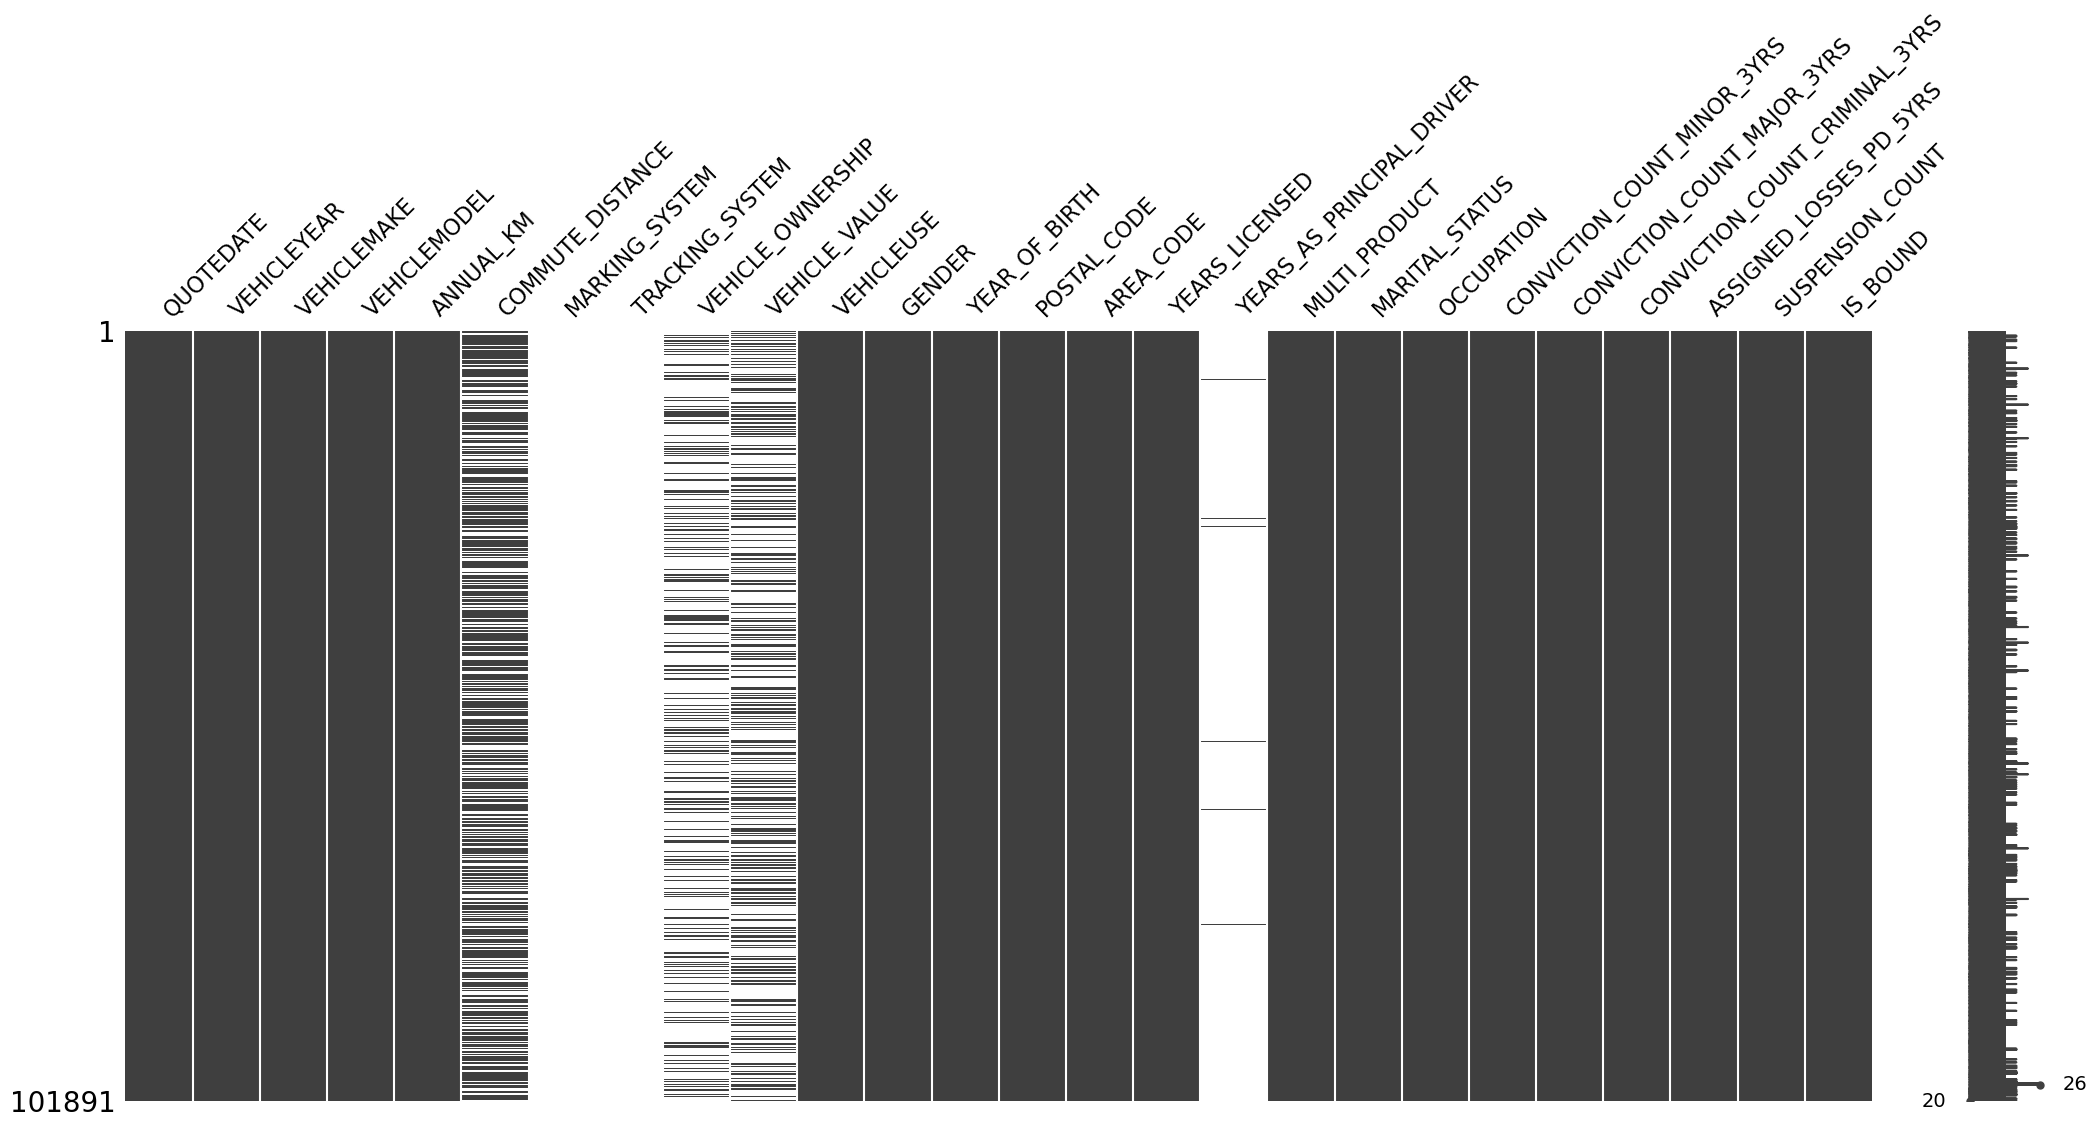

In [23]:
# Visualize missing values as a matrix
msno.matrix(train_df)

In [10]:
train_df['IS_BOUND'].value_counts()

IS_BOUND
0    79599
1    22292
Name: count, dtype: int64

# 2. Data Preprocessing

In [27]:
# QUOTEDATE
df = train_df.drop(['QUOTEDATE'], axis = 1)